# Simple Calculations for Sweep

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import sympy as sym

In [153]:
def cosd(angle):
    return np.cos(np.deg2rad(angle))

def arccosd(angle):
    return np.rad2deg(np.arccos(angle))

def cos(angle):
    return np.cos(angle)

def arccos(angle):
    return np.arccos(angle)

def tand(angle):
    return np.tan(np.deg2rad(angle))

def arctand(angle):
    return np.rad2deg(np.arctan(angle))

General parameters for the wing and aerofoil

In [154]:
CL = 0.27
sweep_25 = 0
M_cruise = 0.75
M_crit = 0.7
M_dd = M_crit + 0.08
b = 12.9
semi_b = b/2
S = 22.2
taper = 0.22

**What drag divergence number do we want? If we are to follow boeing and airbus then our drag divergence number will be equal to our desired cruise mach number. But we can choose this to bes suit our needs.**

In [155]:
M_dd_des = 0.8

In [185]:
sweep_le_des = arccosd(M_dd / M_dd_des)
print(f"Leading edge desired angle {sweep_le_des}")
sweep_quarter_des =arccosd((M_dd / M_dd_des)**0.5)
print(f"Quater chord desired angle {sweep_quarter_des}")

Leading edge desired angle 12.838568140984087
Quater chord desired angle 9.097436169383398


**Finding the thickness to chord ratio using Torenbeek**

In [186]:
def Torenbeek(M, angle, CL):
    M_eff = M*(cosd(angle))
    t_c = 0.3*cosd(angle) * ((1 - ((5 + M_eff**2)/(5 +  (1.2 - 0.25*CL)**2))**3.5)*(((1-M_eff**2)**0.5)/(M_eff**2)))**(2/3)
    return t_c

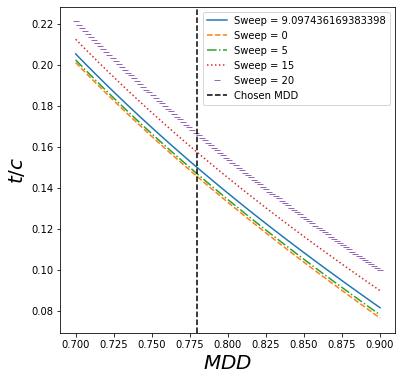

In [187]:
MDD = np.linspace(0.7, 0.9, 100)

t_c = np.array([])
t_c_sweep_0 = np.array([])
t_c_sweep_5 = np.array([])
t_c_sweep_10 = np.array([])
t_c_sweep_15 = np.array([])
t_c_sweep_20 = np.array([])
for value in MDD:
    t_c_sweep_0 = np.append(t_c_sweep_0, Torenbeek(value, 0, CL))
    t_c_sweep_5 = np.append(t_c_sweep_5, Torenbeek(value, 5, CL))
    t_c = np.append(t_c, Torenbeek(value, sweep_quarter_des, CL))
    t_c_sweep_15 = np.append(t_c_sweep_15, Torenbeek(value, 15, CL))
    t_c_sweep_20 = np.append(t_c_sweep_20, Torenbeek(value, 20, CL))

fig, axs = plt.subplots(1,1, figsize=(6, 6))
axs.plot(MDD, t_c, "-", label = f"Sweep = {sweep_quarter_des}")
axs.plot(MDD, t_c_sweep_0, "--", label = "Sweep = 0")
axs.plot(MDD, t_c_sweep_5, "-.", label = "Sweep = 5")
axs.plot(MDD, t_c_sweep_15, ":", label = "Sweep = 15")
axs.plot(MDD, t_c_sweep_20, "_", label = "Sweep = 20")
axs.set_xlabel(r"$MDD$", fontsize = 20)
axs.set_ylabel(r"$t/c$", fontsize = 20)
axs.axvline(x = 0.78, linestyle = "--", color = "k", label = "Chosen MDD")
axs.legend(loc="upper right")
plt.show()

**Using the two types of sweep to calculate the taper ratio**

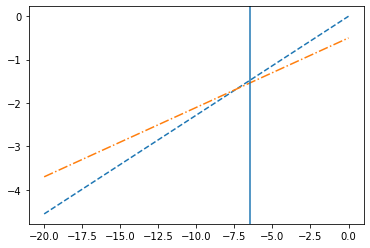

In [188]:
m1 = tand(sweep_le_des)
m2 = tand(sweep_quarter_des)

tip_le = m1*semi_b
tip_quarter = m2*semi_b

theta1 = tip_le
theta2 = tip_quarter

x = np.linspace(-20,0,100)
y1 = m1*x
y2 = m2*x - 0.5

fig, axs = plt.subplots(1,1)
axs.plot(x, y1, "--")
axs.plot(x, y2, "-.")
axs.axvline(x = -semi_b)
plt.show()


# area = 0
# x = 0.5
# while abs(S/2-area) > 0.5:
#     x += 0.01
#     y = x + semi_b*tand(theta2) - tand(theta1)
#     h = ((semi_b*tand(theta1) + 4*y -4*x)**2 + semi_b**2)**0.5
#     theta3 = arctand(h/semi_b)
#     area = semi_b*x + semi_b**2/2 * tand(theta2) - semi_b**2 /2 * tand(theta1) + semi_b*3*x + semi_b**2 / 2 * tand(theta3) - semi_b**2 /2 *tand(theta2)
#     print(area)
#     time.sleep(2)
# print(f"x: {x} and area: {area}")

    

**Wing geometry.**

In [239]:
taper = 0.45
C_root = 2*((S)/(b*(1+ taper)))
C_tip = taper*C_root
print(f"C root: {C_root} and C tip: {C_tip}")


quarter_chord_root = 0.25*C_root
quarter_chord_tip = 0.25*C_tip

length_1 = tand(sweep_quarter_des)*semi_b
point_1 = length_1 - quarter_chord_tip + quarter_chord_root
angle_1 = arctand(point_1/semi_b)
point_2 = point_1 + C_tip
angle_2 = arctand((point_2 - C_root)/semi_b)
print(f"Theta 1: {angle_1}, Theta 2: {angle_2}")


x = sym.Symbol("x")
true_wing_area = sym.integrate(tand(theta2)*x - C_root, (x, 0, -semi_b)) - sym.integrate(tand(theta1)*x, (x, 0, -semi_b))
semi_area = S/2
print(f"This is the area: {true_wing_area}, This is the semi area {semi_area} ")

C root: 2.3736968724939858 and C tip: 1.0681635926222937
Theta 1: 11.899844546997961, Theta 2: 0.4768020909093081
This is the area: 15.1515630557345, This is the semi area 11.1 


In [262]:
HLD_chord_root = 0.3*C_root
HLD_chord_tip = 0.3*C_tip
m = (-(point_2-HLD_chord_tip) + (C_root - HLD_chord_root) )/ (-semi_b - 0)
theta_HL = arctand(m)

HLD_start = 0.1*semi_b
HLD_end = 0.65*semi_b
y = m*(-HLD_end) - (C_root - HLD_chord_root)

x = sym.Symbol("x")
area = sym.integrate(tand(theta2)*x - C_root, (x, -HLD_start, -HLD_end)) - sym.integrate(tand(theta1)*x, (x, -HLD_start, -HLD_end))
semi_area = S/2
Sflapped_ratio = area / true_wing_area 
print(f"This is the area covered by the flap: {area}, This is the Sflapped/Sref ratio {Sflapped_ratio} ")


This is the area covered by the flap: 8.35519217428358, This is the Sflapped/Sref ratio 0.551440940023765 


In [263]:
Cl_max = 1.42
CL_max_des = 2.1
CL_max = 0.9*Cl_max*cosd(sweep_quarter_des)
print(f"This is the desired CL_max: {CL_max_des} and this is the current CL_max: {CL_max}")
print(f"This is the hinge line sweep: {theta_HL}")
delta_CL_max = CL_max_des - CL_max
delta_HLD = delta_CL_max / (0.9*Sflapped_ratio*cosd(theta_HL))
print(f"Desired delta CL from high lift device: {delta_HLD}")
delta_CL_fowler = 1.3*(1+0.3*cosd(40))
print(f"Desired delta CL from high lift device: {delta_HLD}, from TE {delta_CL_fowler}")


This is the desired CL_max: 2.1 and this is the current CL_max: 1.2619238883546027
This is the hinge line sweep: 3.949686546375664
Desired delta CL from high lift device: 1.69267919789550
Desired delta CL from high lift device: 1.69267919789550, from TE 1.5987573328164013


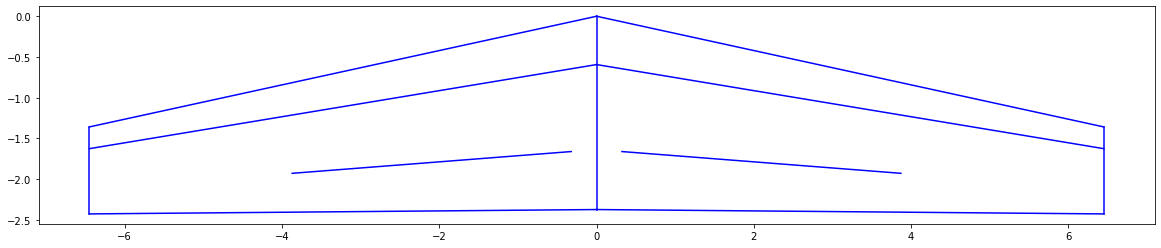

In [244]:

fig_wing, wing_plot = plt.subplots(1,1, figsize=(20, 4))
wing_plot.plot([0,0],[0, -C_root], "b-")
wing_plot.plot([-semi_b, -semi_b], [-point_1, -point_1 - C_tip], "b-")
wing_plot.plot([0, -semi_b], [0, -point_1], "b-")
wing_plot.plot([0, -semi_b], [-C_root, -point_2], "b")
wing_plot.plot([0, -semi_b], [-quarter_chord_root, -(point_1 + quarter_chord_tip)], "b")
wing_plot.plot([semi_b, semi_b], [-point_1, -point_1 - C_tip], "b-")
wing_plot.plot([0, semi_b], [0, -point_1], "b-")
wing_plot.plot([0, semi_b], [-C_root, -point_2], "b")
wing_plot.plot([0, semi_b], [-quarter_chord_root, -(point_1 + quarter_chord_tip)], "b")
#wing_plot.plot([HLD_start, semi_b], [-(C_root - HLD_chord_root),-(point_2 - HLD_chord_tip)], "b")
#wing_plot.plot([-HLD_start, -semi_b], [-(C_root - HLD_chord_root),-(point_2 - HLD_chord_tip)], "b")
wing_plot.plot([HLD_start, HLD_end], [-(C_root - HLD_chord_root), y], "b")
wing_plot.plot([-HLD_start, -HLD_end], [-(C_root - HLD_chord_root),y], "b")



# High Lift Devices

**Just some general parameters that should be considered.**

In [162]:
Cl_max = 1.42
CL_max_des = 1.1*Cl_max
